# Lecture 22: Gradient Descent

Let's say I have two numbers I need to choose, $x$ and $y$, that will determine a function $f(x,y)$ that I want to minimize. E.g. f(x,y) could be the cost of a I will be putting to market and $x$ and $y$ could be certain dimensions of the product, or one could be price. Or f(x,y) could the error with which my model with parameters $x$,$y$ is predicting the stock-market. 

Please think of one other situation when you would want to minimize a multi-variable function. 

<br>

Say, for example:

$$f(x,y) = x^2 + 4y^2 + 4x + y + 6$$

And we want to find the $(x,y)$ that minimizes $f(x,y)$. 

In [1]:
import numpy as np

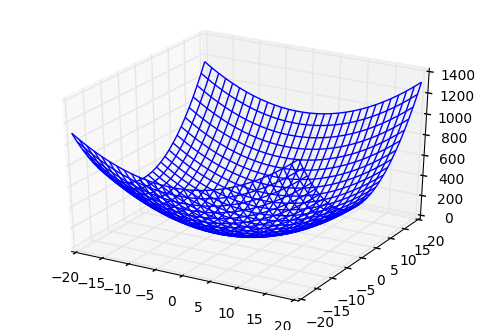

In [2]:
f = lambda x, y: x*x + 2*y*y + 4*x + y + 6

# I copy-pasted this code from matplotlib documentation and modified it to graph f.
# You don't need to know how to make 3d graphs

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-20,20,300)
Y = np.linspace(-20,20,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

<br>

So how do we find the $(x,y)$ that minimizes the function $f$? Here are three ideas, all of which work for our case. 

**Idea #1**: Try a bunch of random values of $x$ and $y$. Keep the $x,y$ with the smallest values seen.

Not a bad idea in 2-dimensions. But will it work if $f$ were $f(x_1,x_2,x_3,..., x_{100})$ with lots of parameters instead of just two variables? No, because there are too many points to look at.

**Idea #2**: Look at the partial derivatives of $f$ and solve $\frac{\partial f}{\partial x}(x,y) = 0$ and $\frac{\partial f}{\partial y}(x,y) = 0$. The idea here is that at a local mininum, the partial derivatives will all be 0. 

This is great in our case because the partial derivatives are solved easily. But again, if we had lots and lots of parameters, e.g. $f(x_1,x_2,x_3,..., x_{100})$, we would have to solve 100 equations, this would be fine if all the partial derivatives were linear, but in general it's very hard to solve lots of non-linear equations. 

**Idea #3:** Start at a point $(x,y)$ and "go downhill". 

**Fact from calculus:** At any point $(x,y)$, the gradient $\nabla f (x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$ will give the direction that makes $f$ increase the most. 

If $\nabla f (x,y)$ will give the direction of steepest ascent, then $- \nabla f (x,y)$ will give the direction of steepest descent. So I can re-write:

**Idea #3:** Start at a a point and iteratively (in a loop) change $(x,y)$ to 

$$(x,y) - \eta \nabla f (x,y),$$

where $\eta$ is a small number. 

Let's code it:

minimal f(x,y):  1.8750000602057808 at point (-1.9997546313362582, -0.24999999629608344)


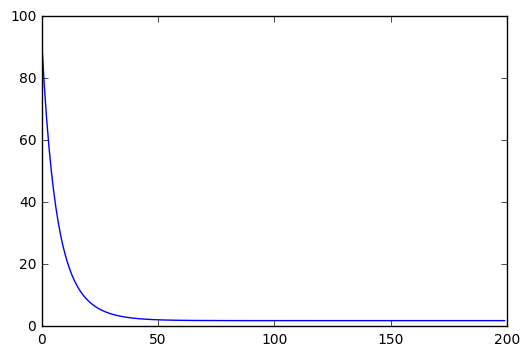

In [3]:
f = lambda x, y: x*x + 2*y*y + 4*x + y + 6
delfdelx = lambda x, y: 2*x + 4  # partial derivative of our function f with respect to x
delfdely = lambda x, y: 4*y + 1

# starting at (5,5) for no reason
x, y = 5, 5

# this is the rate at which we'll move to the opposite of the gradient
# sometimes 1alled "learning rate" in machine learning
eta = 0.025

# we'll store all this:
x_vals = []
y_vals = []
f_vals = []

num_steps = 200
for i in range(num_steps):
    # update x and y
    dx = delfdelx(x, y)
    dy = delfdely(x, y)
    x = x - eta * dx
    y = y - eta * dy
    
    # let's store the x, y and f(x,y) values for later use
    x_vals.append(x)
    y_vals.append(y)
    f_vals.append(f(x, y))


print("minimal f(x,y): ", f(x,y), "at point", (x,y))
# let's see what the f(x,y) values were    
plt.plot(range(num_steps), f_vals)
plt.show()


Let's also visualize what happens on a contour graph. 

This is the contour graph of $f$. The curves are the solutions to $f(x,y) = c$ where $c$ is the labeled number on each curve. 

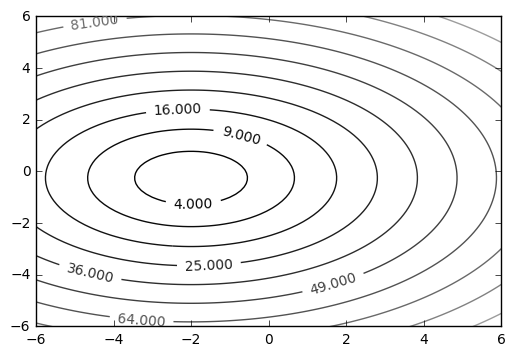

In [4]:
X = np.linspace(-20,20,300)
Y = np.linspace(-20,20,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

Let's include the arrows for how gradient descent moves us. 

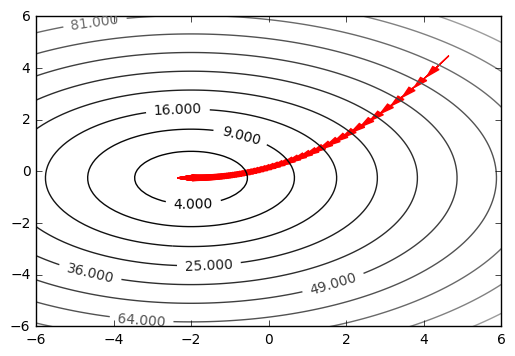

In [5]:
plt.figure(111)
ax = plt.subplot(111)
CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)
# let's plot every few times to avoid congestion of arrows in the picture
delta_n = 1
for i in range(0,99,delta_n):
    #plt.scatter(x_vals[i], y_vals[i])
    plt.arrow(x_vals[i], y_vals[i], (x_vals[i+delta_n] - x_vals[i]), (y_vals[i+delta_n] - y_vals[i]), head_width=0.2, head_length=0.4, color="red")

#plt.plot(x_vals, y_vals)
plt.show()

So our point $(x,y)$ is really going downhill towards the minimum!

**Question**: What happens if you take $\eta$ (`eta`) to be too big? Try guessing what will happen and then go and try `eta = 0.45` in the code. 

## Numerical gradient:

The gradient descent method works really well not just for polynomial functions but all kinds of functions. How do we take derivatives in general though? Two ways:

* **Symbolic**: presumable we know the formula $f$ is, so we can take the derivative using our knowledge of derivatives. (that's what we did above)
* **Numerical**: we can numerically approximate using the definition of derivative:

$$\frac{d f}{d x}(x) = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}$$

So, to numerically approximate the derivative, we could take $h = 0.00001$ for example.

In [6]:
def num_derivative(f):
    h = 0.00001
    return (lambda x: (f(x+h)-f(x))/h)

In [7]:
f = lambda x: x*x
num_derivative(f)(1)

2.00001000001393

We can of course do it for partial derivatives:

In [8]:
def numdelx(f):
    h = 0.00001
    return (lambda x, y: (f(x+h, y)-f(x, y))/h)

def numdely(f):
    h = 0.00001
    return (lambda x, y: (f(x, y+h)-f(x, y))/h)


We can then do gradient descent for any function without taking the partial derivatives by hand:

In [9]:
def grad_descent(f, nabla=0.02, num_steps=200):
    # starting at (5,5) for no reason
    x, y = 5, 5

    x_vals = []
    y_vals = []
    f_vals = []

    for i in range(num_steps):
        # update x and y
        dx, dy = numdelx(f)(x,y), numdely(f)(x,y)
        x = x - nabla* dx
        y = y - nabla * dy

        # let's store the x, y and f(x,y) values for later use
        x_vals.append(x)
        y_vals.append(y)
        f_vals.append(f(x, y))
    
    return x_vals, y_vals, f_vals

minimal f(x,y):  7.08728167914 at point (-1.9997546313362582, -0.24999999629608344)


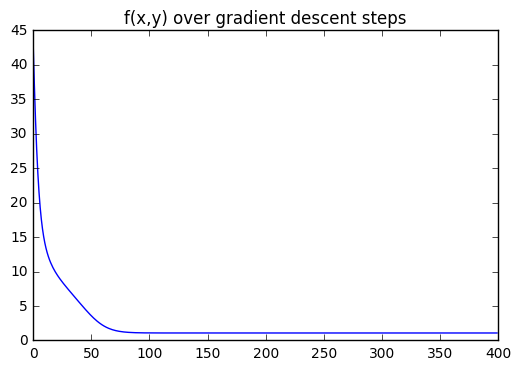

In [10]:
f = lambda x, y: 2*np.sin(x) + x*x + y*y + 5*np.cos(y)
num_steps = 400
x_vals, y_vals, f_vals = grad_descent(f, num_steps=num_steps)
print("minimal f(x,y): ", f(x,y), "at point", (x,y))
# let's see what the f(x,y) values were    
plt.title("f(x,y) over gradient descent steps")
plt.plot(range(num_steps), f_vals)
plt.show()




Let's see the contour stuff too.

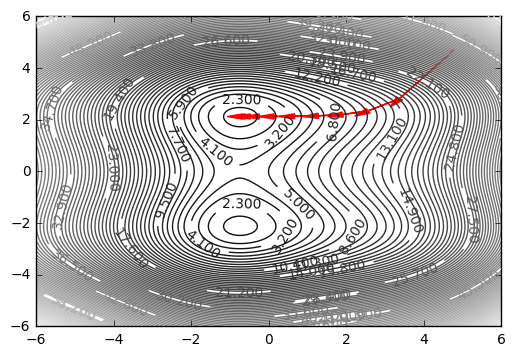

In [11]:
X = np.linspace(-10,10,300)
Y = np.linspace(-10,10,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

plt.figure(111)
ax = plt.subplot(111)
CS = plt.contour(X, Y, Z, [-4 + 0.9*i for i in range(100)], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)
# let's plot every few times to avoid congestion of arrows in the picture
delta_n = 10
for i in range(0,99,delta_n):
    #plt.scatter(x_vals[i], y_vals[i])
    plt.arrow(x_vals[i], y_vals[i], (x_vals[i+delta_n] - x_vals[i]), (y_vals[i+delta_n] - y_vals[i]), head_width=0.2, head_length=0.4, color="red")

#plt.plot(x_vals, y_vals)
plt.show()

**Cute fact:** $$\frac{f(x + h) - f(x - h)}{2h}$$ will give you a much better estimate of the derivative with the same $h$. Why is it so?